##  **Exploratory Data Analysis** (EDA)

En el documento 'etl.ipynb' se realizó un primer análisis y limpieza de datos. Corresponde ahora investigar relaciones
entre las variables, outliers, patrones o cualquier otra consideración de relevancia para el sistema de recomendación.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\GASTON\Desktop\PI1\DATA\movies_credits.csv', encoding= 'utf8', low_memory=False)
df.head(3)

,id,spoken_languagesname,genresname,title,budget,revenue,overview,release_date,vote_average,vote_count,popularity,runtime,status,tagline,production_companiesname,production_countriesname,release_year,return,director,actor
0,100,English,"Crime, Comedy","Lock, Stock and Two Smoking Barrels",1350000.0,3897569.0,A card sharp and his unwillingly-enlisted frie...,1998-03-05,7.5,1671.0,4.607860,105.0,Released,A Disgrace to Criminals Everywhere.,Handmade Films Ltd.,United Kingdom,1998,2.887088,Guy Ritchie,"Jason Flemyng, Dexter Fletcher, Nick Moran, Ja..."
1,10000,Español,"Drama, Comedy",La estrategia del caracol,0.0,0.0,A group of tenants living in an old house are ...,1993-12-25,7.2,9.0,0.281609,116.0,Released,Sin Datos,Ministère de la Culture et de la Francophonie,Colombia,1993,0.000000,Sergio Cabrera,NaN
2,10001,English,"Science Fiction, Comedy",Young Einstein,0.0,0.0,Albert Einstein is the son of a Tasmanian appl...,1988-12-15,4.5,46.0,2.562888,91.0,Released,E=mc²,Warner Bros.,Australia,1988,0.000000,Yahoo Serious,"Yahoo Serious, Odile Le Clezio, Peewee Wilson,..."


In [3]:
df.dtypes #Ante todo, corresponde ver si el DataFrame tiene las columnas con el tipo de datos correcto.

id                            int64
spoken_languagesname         object
genresname                   object
title                        object
budget                      float64
revenue                     float64
overview                     object
release_date                 object
vote_average                float64
vote_count                  float64
popularity                  float64
runtime                      object
status                       object
tagline                      object
production_companiesname     object
production_countriesname     object
release_year                  int64
return                      float64
director                     object
actor                        object
dtype: object

In [4]:
#Corregimos los tipos de datos de las columnas.
df['id'] = df['id'].astype('int64')
df['release_date']= (pd.to_datetime(df['release_date'],errors='coerce'))
df['runtime'] =(pd.to_numeric(df['runtime'],errors= 'coerce'))

## Tratamiento de Nulos y Valores Faltantes

Corresponde chequear la existencia de valores nulos en el Dataset

In [5]:
df.isnull().sum() #No tengo valores nulos

id                             0
spoken_languagesname        3891
genresname                  2384
title                          0
budget                         0
revenue                        0
overview                       5
release_date                   0
vote_average                   0
vote_count                     0
popularity                     0
runtime                      246
status                         0
tagline                        1
production_companiesname       0
production_countriesname       0
release_year                   0
return                         0
director                     836
actor                       2474
dtype: int64

En primer lugar, se observa la existencia de valores nulos en las columnas de 'Director' y 'Actor'. 

In [6]:
df_nulos = df.copy()
df_nulos.head(1)

,id,spoken_languagesname,genresname,title,budget,revenue,overview,release_date,vote_average,vote_count,popularity,runtime,status,tagline,production_companiesname,production_countriesname,release_year,return,director,actor
0,100,English,"Crime, Comedy","Lock, Stock and Two Smoking Barrels",1350000.0,3897569.0,A card sharp and his unwillingly-enlisted frie...,1998-03-05,7.5,1671.0,4.60786,105.0,Released,A Disgrace to Criminals Everywhere.,Handmade Films Ltd.,United Kingdom,1998,2.887088,Guy Ritchie,"Jason Flemyng, Dexter Fletcher, Nick Moran, Ja..."


In [7]:
#Se crean nuevas columnas para que interactúen con otras, y así poder comparar con presupuesto y popularidad.
df_nulos['is_director_null'] = df['director'].isnull()
df_nulos['is_actor_null'] = df['actor'].isnull()
df_nulos.columns

Index(['id', 'spoken_languagesname', 'genresname', 'title', 'budget',
       'revenue', 'overview', 'release_date', 'vote_average', 'vote_count',
       'popularity', 'runtime', 'status', 'tagline',
       'production_companiesname', 'production_countriesname', 'release_year',
       'return', 'director', 'actor', 'is_director_null', 'is_actor_null'],
      dtype='object')

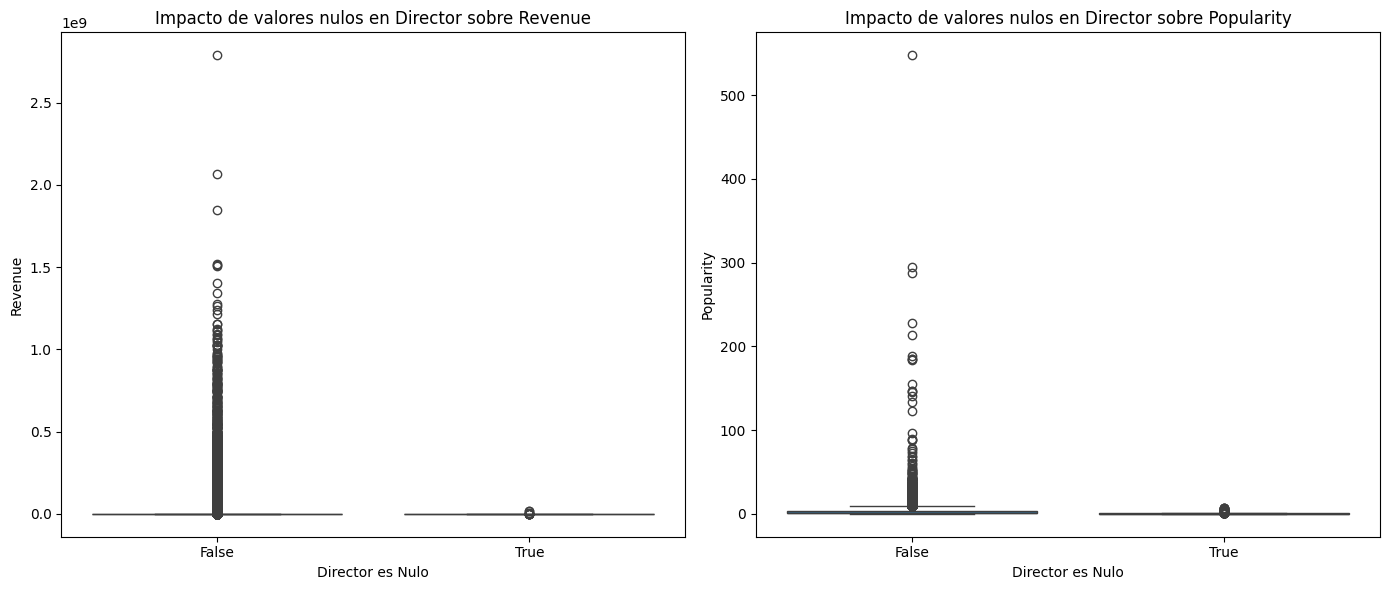

In [134]:
# Creamos una figura con dos subplots
# En una se comparará el director con 'Revenue' (Ganancia) y en la otra con 'popularity' (Popularidad)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 

sns.boxplot(x='is_director_null', y='revenue', data=df_nulos, ax=axes[0])
axes[0].set_title('Impacto de valores nulos en Director sobre Revenue')
axes[0].set_xlabel('Director es Nulo')
axes[0].set_ylabel('Revenue')

# A la derecha mostraremos el impacto de los valores nulos sobre 'Popularity'
sns.boxplot(x='is_director_null', y='popularity', data=df_nulos, ax=axes[1])
axes[1].set_title('Impacto de valores nulos en Director sobre Popularity')
axes[1].set_xlabel('Director es Nulo')
axes[1].set_ylabel('Popularity')

plt.tight_layout()
plt.show()

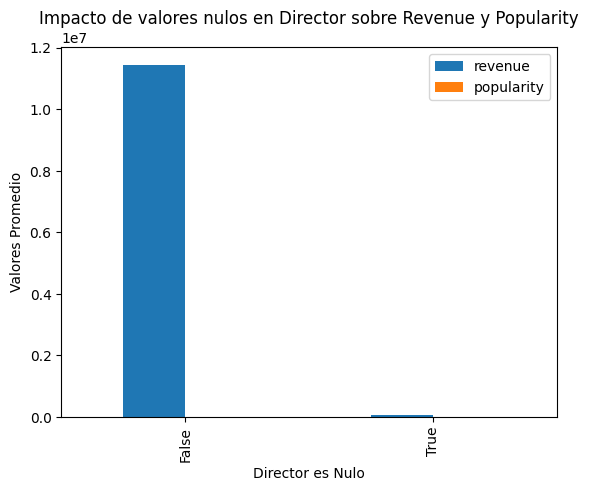

In [135]:
df_nulos.groupby('is_director_null')[['revenue', 'popularity']].mean().plot(kind='bar')
plt.title('Impacto de valores nulos en Director sobre Revenue y Popularity')
plt.xlabel('Director es Nulo')
plt.ylabel('Valores Promedio')
plt.show()

Podemos observar que los valores nulos o faltantes para 'Director' no suponen implicancias significantes en ganancia ni en la popularidad de la filmación.

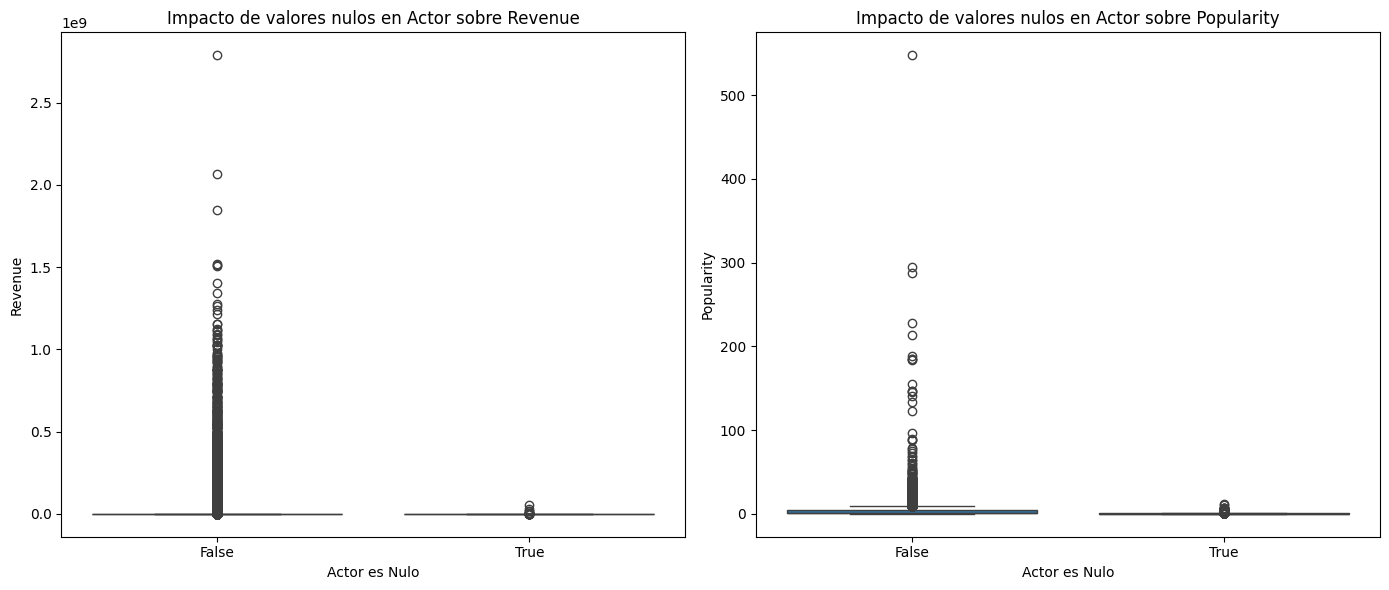

In [136]:
#Repetimos el proceso, para comparar las mismas métricas, pero esta vez con 'Actor'.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 

sns.boxplot(x='is_actor_null', y='revenue', data=df_nulos, ax=axes[0])
axes[0].set_title('Impacto de valores nulos en Actor sobre Revenue')
axes[0].set_xlabel('Actor es Nulo')
axes[0].set_ylabel('Revenue')

# A la derecha mostraremos el impacto de los valores nulos sobre 'Popularity'
sns.boxplot(x='is_actor_null', y='popularity', data=df_nulos, ax=axes[1])
axes[1].set_title('Impacto de valores nulos en Actor sobre Popularity')
axes[1].set_xlabel('Actor es Nulo')
axes[1].set_ylabel('Popularity')

plt.tight_layout()
plt.show()

Al igual que para el caso de 'Director', los campos faltantes o nulos en la columna 'actor' carecen de relevancia en el dataset (tomándose como parámetro su incidencia en popularidad de la película y ganancia).<br>
De esta forma, **se pueden eliminar las filas con datos nulos o valores faltantes para estas columnas**.

In [8]:
df = df.dropna(subset=['actor', 'director'])

print(df.isnull().sum())# Verificamos que no existan nulos en esas columnas

id                             0
spoken_languagesname        2790
genresname                  1658
title                          0
budget                         0
revenue                        0
overview                       4
release_date                   0
vote_average                   0
vote_count                     0
popularity                     0
runtime                      198
status                         0
tagline                        1
production_companiesname       0
production_countriesname       0
release_year                   0
return                         0
director                       0
actor                          0
dtype: int64


En el proceso de ETL se identificaron los primeros valores nulos, y aplicó una función para reemplazar según el tipo de dato.

In [9]:
#Función utilizada
def reemplazarNulos(df, columna, valor):
    """
    Esta función rellena los valores NaN en una columna específica de un DataFrame.
    Se esperan tres (3) parámentros:
    df (DataFrame): Sobre este DataFrame se realizará la operación.
    columna (str): Es el nombre de la columna del DataFrame en la que se reemplazarán los valores.
    valor: El valor con el que sr reemplazan los NaN en la columna.

    Se retorna un DataFrame con los nulos rellenados en las columnas indicadas.

    Si debo rellenar múltiples columnas con diferentes valores, se puede mapear un diccionario de claves-valor y aplicar la función de manera iterativa.
    """
    df.loc[:, columna] = df[columna].fillna(valor)
    return df

In [10]:
#La volvemos a aplicar sobre los nuevos valores

mapeo_nulos = {
    'spoken_languagesname': 'Sin Datos',
    'genresname': 'Sin Datos',
    'runtime': 'Sin Datos',
    'status': 'Sin Datos',
    'tagline': 'Sin Datos',
    'overview': 'Sin Datos',}

for columna, dato in mapeo_nulos.items():
    df = reemplazarNulos(df, columna, dato)

C:\Users\GASTON\AppData\Local\Temp\ipykernel_14216\3482283154.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[105.0 91.0 116.0 ... 109.0 91.0 163.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, columna] = df[columna].fillna(valor)


In [11]:
df.isnull().sum() #No tengo valores nulos

id                          0
spoken_languagesname        0
genresname                  0
title                       0
budget                      0
revenue                     0
overview                    0
release_date                0
vote_average                0
vote_count                  0
popularity                  0
runtime                     0
status                      0
tagline                     0
production_companiesname    0
production_countriesname    0
release_year                0
return                      0
director                    0
actor                       0
dtype: int64

Ahora no tenemos valores "Nulos". Los manejaremos como un dato categórico bajo la denominación "Sin Datos".

In [141]:
# Contar "Sin Datos" por columna
df_sindatos = df.copy()
sin_datos_por_columna = df_sindatos.isin(['Sin Datos']).sum()

print("Cantidad de registros con 'Sin Datos' por columna:")
print(sin_datos_por_columna)


Cantidad de registros con 'Sin Datos' por columna:
id                              0
spoken_languagesname         2790
genresname                   1658
title                           0
budget                          0
revenue                         0
overview                      837
release_date                    0
vote_average                    0
vote_count                      0
popularity                      0
runtime                       198
status                         49
tagline                     22918
production_companiesname     9879
production_countriesname     4803
release_year                    0
return                          0
director                        0
actor                           0
dtype: int64


Observamos una gran cantidad de faltantes (Sin datos) en la columna 'Tagline'. Aquí notamos que la información de esa columna puede tornarse irrelevante. Pero antes de eliminarla, verificamos si la información que nos podría aportar surge de otro segmento del conjunto. El objetivo es analizar la incidencia en el sistema de recomendación.

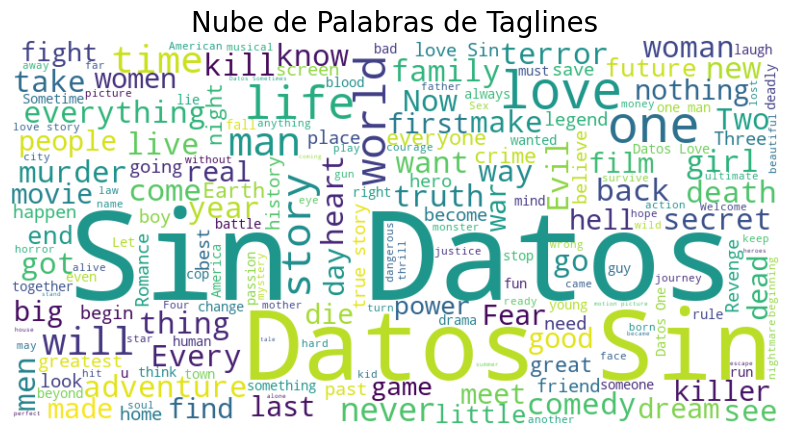

In [142]:
# Analizaremos la columna 'tagline' con nube de palabras
# Primero, se deben unir todos los textos de la columna en una única cadena
text = ' '.join(df_sindatos['tagline'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text) #Se crea la nube
#Parámetros de muestra:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Nube de Palabras de Taglines', fontsize=20)
plt.show()

Vemos la gran preponderancia de filas sin datos. Se pueden resaltar palabras que hacen referencia a géneros (comedy, terror, adventure), por lo que hay información disponible en la columna 'genres'.
Se destacan otras palabras, como por ejemplo: love, men, woman/women, life.
Vamos a compararla con los títulos de las películas, y la columna 'overview' (resumen), para identificar si obtenemos resultados similares.

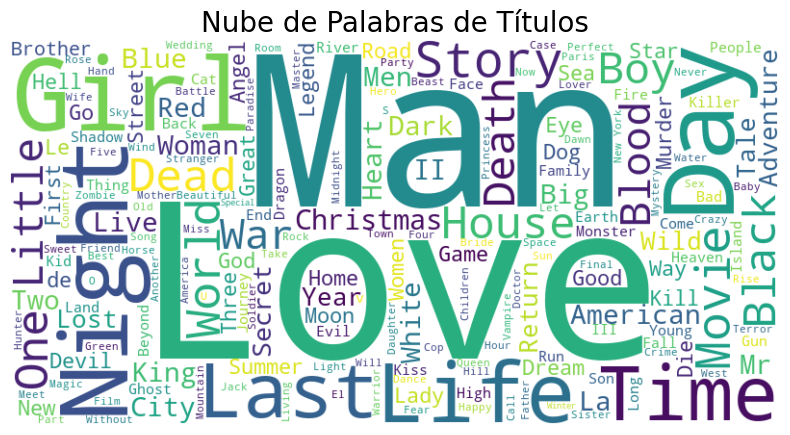

In [143]:
# Análisis de las palabras en los títulos
text = ' '.join(df_sindatos['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Parámetros para la imagen
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Nube de Palabras de Títulos', fontsize=20)
plt.show()

Inmediatamente encontramos referencias a los géneros masculino y femenino (Man, Girl, Women, Boy), al igual que en la columna 'Tagline'. "Love" aparece como una palabra clave, y también podemos encontrar "Life", "War", "Night", entre otras al mismo nivel.
Es decir: El título ofrece palabras similares al 'tagline'.

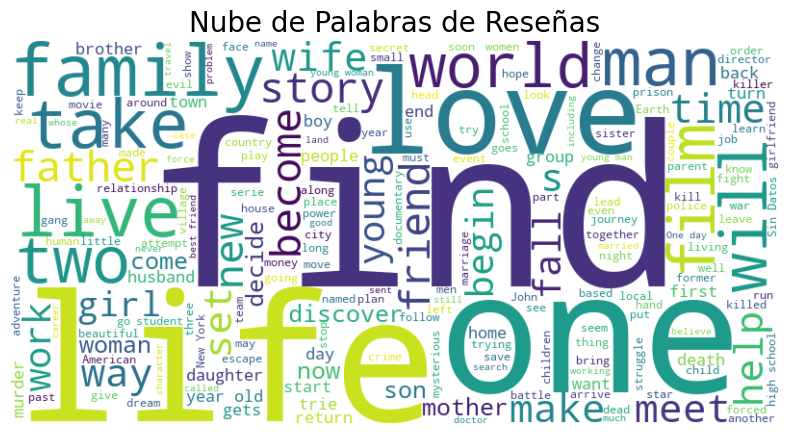

In [144]:
# Análisis de las palabras del "Overview" (pequeño resumen)
text = ' '.join(df_sindatos['overview'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Parametros de la figura
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.title('Nube de Palabras de Reseñas', fontsize=20)
plt.show()

La reseña no coincide tanto como el título en sus palabras clave, pero sí notamos una gran coincidencia en palabras de segundo plano.
En conclusión, ante la gran cantidad de datos faltantes de la columna 'tagline', sumado a que no aporta información tan relevante (o que puede ser suplida por otros datos disponibles), **se procede a eliminar la columna**.

In [12]:
df = df.drop('tagline', axis=1)
print(df.columns)

Index(['id', 'spoken_languagesname', 'genresname', 'title', 'budget',
       'revenue', 'overview', 'release_date', 'vote_average', 'vote_count',
       'popularity', 'runtime', 'status', 'production_companiesname',
       'production_countriesname', 'release_year', 'return', 'director',
       'actor'],
      dtype='object')


In [146]:
df_sindatos = df.copy()
sin_datos_por_columna = df_sindatos.isin(['Sin Datos']).sum()

print("Cantidad de registros con 'Sin Datos' por columna:")
print(sin_datos_por_columna)

Cantidad de registros con 'Sin Datos' por columna:
id                             0
spoken_languagesname        2790
genresname                  1658
title                          0
budget                         0
revenue                        0
overview                     837
release_date                   0
vote_average                   0
vote_count                     0
popularity                     0
runtime                      198
status                        49
production_companiesname    9879
production_countriesname    4803
release_year                   0
return                         0
director                       0
actor                          0
dtype: int64


## Tratamiento de Valores Duplicados
Es necesario recordar que ya se hizo una depuración de duplicados en el proceso de ETL.
Sin embargo, corresponde verificar algunos supuestos que pueden haberse dejado de lado.

In [147]:
# Primero analizamos si hay duplicados identificables en todo el DataFrame
dup_tot = df.duplicated().sum()
print(f'Filas duplicadas en el DataFrame: {dup_tot}')

Filas duplicadas en el DataFrame: 0


In [148]:
# Otro de los elementos que podrían reflejar valores duplicados se encuentran en la columna 'id'
id_dup = df['id'].duplicated().sum()
print(f'Duplicados en la columna "id": {id_dup}')


Duplicados en la columna "id": 0


In [149]:
# Otra forma de duplicación a considerar serían películas con el mismo nombre, pero con distinta fecha de lanzamiento.
# Para analizarlo, verificamos duplicados en las columnas 'title' y 'release_date'
title_release_dup = df.duplicated(subset=['title', 'release_date']).sum()
print(f'Duplicados en "title" y "release_date": {title_release_dup}')


Duplicados en "title" y "release_date": 0


En esta instancia, se ha constatado que la depuración de duplicados en el proceso de ETL ha sido satisfactoria.

## Manejo de idiomas y caracteres
Ya podemos ir adelantando que el sistema de recomendación consiste en el ingreso de un nombre de una película, para devolver un listado de películas similares.
Por ello, observando los diferentes títulos, observamos que podemos excluir títulos en idiomas que utilizan sistemas de escritura no latinos, como los idiomas con alfabetos cirílicos (ruso, búlgaro, serbio), alfabetos griegos, y escrituras logográficas o silábicas como el chino, japonés (kanji y kana), y coreano (hangul), entre otros.
Procederemos a depurar el dataset, conservando títulos que utilicen el alfabeto latino.

In [13]:
#Se crea una función para identificar y eliminar filas que no contengan un patrón del alfabeto latino en determinada 
# columna.
def filtrarTexto(df, columna):
    """
    Se determina un patrón alfabético, numérico y de caracteres especiales.
    La función analiza la coincidencia con esos campos y, si sólo si hay coincidencia lo incorpora al DataFrame
    de retorno. Previo, se realiza una limpieza de los caracteres inusuales en la columna especificada.
    Se esperan dos parámeteros:
    df (pd.DataFrame): El DataFrame original luego de la union
    columna (str): El nombre de la columna a evaluar.
    Retorna un DataFrame con las filas cuyo título tenga alfabeto latino.
    """
    # Definir el patrón regex para títulos que contienen solo caracteres romanos y algunos caracteres especiales
    permitido = re.compile(r'^[A-Za-z0-9$#@!¡?¿ ]+$') #Usamos la función compile de la galería 're'. Esa función 
    # toma un "patrón" de búsqueda y lo prepara para poder usarlo rápidamente.
    #El patrón permitido comprende las letras de la A a la Z (en mayúscula y minúscula), los 10 dígitos numéricos y 
    #Los caracteres especiales indicados.

    # Ahora creamos un filtro, y un nuevo dataset en el que se aplique.
    filtro = df[columna].apply(lambda x: bool(permitido.match(str(x))))
    df_depurado = df.loc[filtro].copy()
    #Esta función verifica si el valor de cada registro, luego de ser convertido a texto con str, coincide con el patrón permitido.

    df_depurado.loc[:, columna] = df_depurado[columna].str.replace(r'^,+', '', regex=True)
    df_depurado.loc[:, columna] = df_depurado[columna].str.replace(r'^[?,]+', '', regex=True).str.strip(',')
    #Luego de aplicar el filtro, en muchas cadenas se observan comas (,), signos de interrogación (?) u otros.
    #Este fragmento realiza primero un reemplazo por caracteres vacíos, y luego el método strip para limpiarlos.
    
    return df_depurado

In [14]:

# La función puede aplicarse a cualquier columna de texto (str), pero considerando nuestro sistema de recomendación,
#las modificaciones se realizan sobre la base de otros idiomas o alfabetos que consten en 'title'.
df = filtrarTexto(df, 'title')
df.head()

,id,spoken_languagesname,genresname,title,budget,revenue,overview,release_date,vote_average,vote_count,popularity,runtime,status,production_companiesname,production_countriesname,release_year,return,director,actor
2,10001,English,"Science Fiction, Comedy",Young Einstein,0.0,0.0,Albert Einstein is the son of a Tasmanian appl...,1988-12-15,4.5,46.0,2.562888,91.0,Released,Warner Bros.,Australia,1988,0.0,Yahoo Serious,"Yahoo Serious, Odile Le Clezio, Peewee Wilson,..."
3,100010,English,"Drama, War",Flight Command,0.0,0.0,"A rookie flyer, Ens. Alan Drake, joins the fam...",1940-12-27,6.0,1.0,0.769266,116.0,Released,Metro-Goldwyn-Mayer (MGM),United States of America,1940,0.0,Frank Borzage,"Robert Taylor, Ruth Hussey, Walter Pidgeon, Pa..."
4,100017,Deutsch,Drama,Hounded,0.0,0.0,Deals with the obsessive relationship between ...,2006-08-06,4.8,7.0,2.964103,87.0,Released,MMM Film Zimmermann & Co,Germany,2006,0.0,Angelina Maccarone,"Kostja Ullmann, Maren Kroymann, Moritz Grove, ..."
5,10002,English,"Drama, Crime, Romance",Mona Lisa,0.0,5794184.0,"George has just been released from prison, and...",1986-06-13,6.7,62.0,3.095584,104.0,Released,The Criterion Collection,United Kingdom,1986,0.0,Neil Jordan,"Bob Hoskins, Cathy Tyson, Michael Caine, Robbi..."
6,100024,English,"Thriller, Horror",Bloodwork,0.0,0.0,A couple of college students decide to sign up...,2012-05-10,4.3,13.0,1.099911,100.0,Released,Sin Datos,United States of America,2012,0.0,Eric Wostenberg,"Travis Van Winkle, Tricia Helfer, Eric Roberts..."


Depuración final para el sistema de recomendación

In [15]:
#El sistema de recomendación no requiere todas las columnas del dataset (que sí es utilizado para los demás endpoints)
# Se procede a crear un nuevo DataFrame y eliminar las columnas no utilizadas
df_mlops = df.copy()
df_mlops.drop(columns=['budget','revenue','release_date','vote_count','runtime','production_companiesname','return'], inplace=True)
#Luego, eliminamos las películas no estrenadas:
df_mlops = df_mlops[df_mlops['status'] == 'Released']
df_mlops.head(3)

,id,spoken_languagesname,genresname,title,overview,vote_average,popularity,status,production_countriesname,release_year,director,actor
2,10001,English,"Science Fiction, Comedy",Young Einstein,Albert Einstein is the son of a Tasmanian appl...,4.5,2.562888,Released,Australia,1988,Yahoo Serious,"Yahoo Serious, Odile Le Clezio, Peewee Wilson,..."
3,100010,English,"Drama, War",Flight Command,"A rookie flyer, Ens. Alan Drake, joins the fam...",6.0,0.769266,Released,United States of America,1940,Frank Borzage,"Robert Taylor, Ruth Hussey, Walter Pidgeon, Pa..."
4,100017,Deutsch,Drama,Hounded,Deals with the obsessive relationship between ...,4.8,2.964103,Released,Germany,2006,Angelina Maccarone,"Kostja Ullmann, Maren Kroymann, Moritz Grove, ..."


In [16]:
#Se guarda el archivo en formato parquet
df_mlops.to_parquet(r'C:\Users\GASTON\Desktop\PI1\DATA\df_mlops.parquet', engine='pyarrow')

## Análisis Estadístico de Datos

Corresponde realizar un análisis estadístico, a los efectos de comprender la distribución de los datos. Asimismo, podremos observar las diferentes correlaciones entre los distintos tipos de datos.
En primer lugar, se intentará conocer la distribución de los datos de presupuesto, ganancia, promedio de votos, conteo de votos, popularidad y duración de la película. Estas variables representan los datos numéricos del dataset.

In [152]:
df[['budget','revenue','return','vote_average','vote_count','popularity', 'runtime']].describe() #Analizamos características generales de las variables numéricas

,budget,revenue,return,vote_average,vote_count,popularity
count,3.463800e+04,3.463800e+04,3.463800e+04,34638.000000,34638.00000,34638.000000
mean,4.373907e+06,1.123896e+07,7.266168e+02,5.677606,115.04446,3.103725
std,1.682361e+07,6.095430e+07,8.384917e+04,1.777699,492.63205,6.270098
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,5.100000,4.00000,0.470596
50%,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,11.00000,1.255645
75%,0.000000e+00,0.000000e+00,0.000000e+00,6.800000,38.00000,4.141810
max,2.700000e+08,2.787965e+09,1.239638e+07,10.000000,14075.00000,547.488298


Podemos analizar la distribución de los datos con un histograma

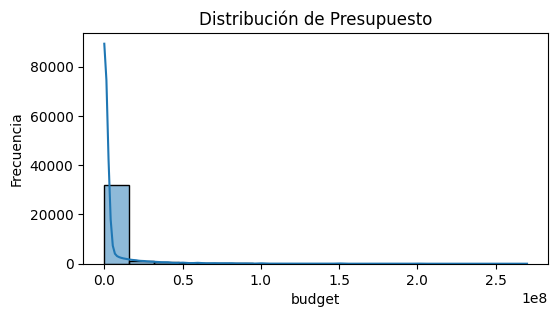

In [153]:
%matplotlib inline 
plt.figure(figsize=(6, 3))
sns.histplot(df['budget'].dropna(), kde=True)
plt.title(f'Distribución de Presupuesto')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.show()


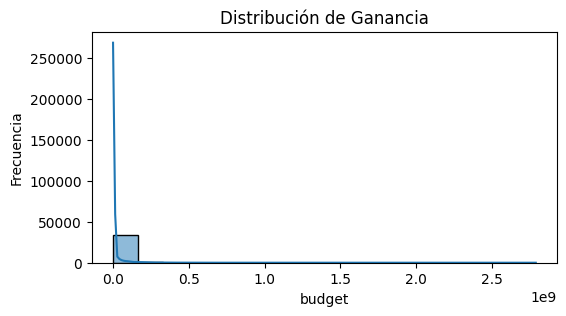

In [154]:
plt.figure(figsize=(6, 3))
sns.histplot(df['revenue'].dropna(), kde=True)
plt.title(f'Distribución de Ganancia')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.show()

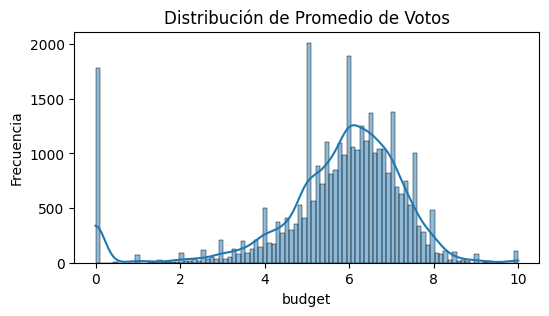

In [155]:
plt.figure(figsize=(6, 3))
sns.histplot(df['vote_average'].dropna(), kde=True)
plt.title(f'Distribución de Promedio de Votos')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.show()

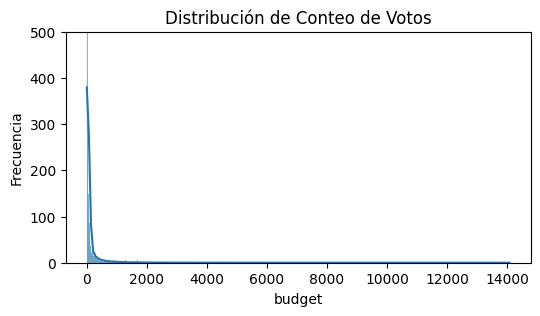

In [156]:
plt.figure(figsize=(6, 3))
sns.histplot(df['vote_count'].dropna(), kde=True)
plt.title(f'Distribución de Conteo de Votos')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.ylim(0, 500)
plt.show()

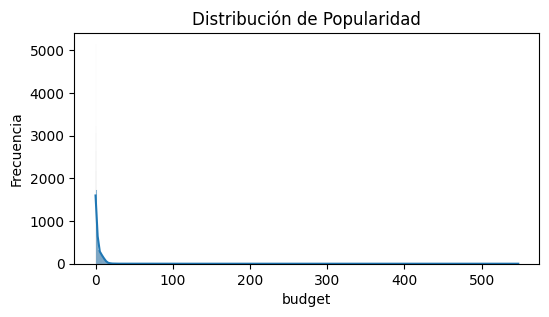

In [157]:
plt.figure(figsize=(6, 3))
sns.histplot(df['popularity'].dropna(), kde=True)
plt.title(f'Distribución de Popularidad')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.show()

C:\Users\GASTON\AppData\Local\Temp\ipykernel_10772\2999244294.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['runtime'] = pd.to_numeric(df['runtime'].replace('Sin Datos', np.nan), errors='coerce')


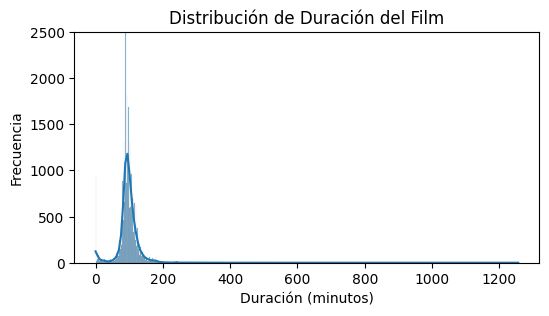

In [164]:
df['runtime'] = pd.to_numeric(df['runtime'].replace('Sin Datos', np.nan), errors='coerce')

# Crear el histograma
plt.figure(figsize=(6, 3))
sns.histplot(df['runtime'].dropna(), kde=True)
plt.title(f'Distribución de Duración del Film')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.ylim(0, 2500)
plt.show()


En la columna de Promedio de Votos observamos respecto de la disposición y disponibilidad de los datos una distribución normal, sin sesgos considerables.

Buscamos la matirz de correlacion de las variables numericas , y mostramos la correlacion entre ellas . 
Observando una alta correlacion y logica entre Budget y Revenue. Es decir que mientras mayor presupuesto por lo general mayor es el revenue. 
Por otro lado vemos que el promedio de los votos de la pelicula no tiene relacion practicamente con estas dos variables, como si lo podria tener la cantidad de votos y la popularidad

In [165]:
df_correlacion = df[['budget', 'revenue', 'vote_average', 'vote_count', 'popularity', 'runtime']].corr()
#El método corr() calcula la matriz de correlación (sus relaciones lineales) para los valores seleccionados.
print(df_correlacion)

                budget   revenue  vote_average  vote_count  popularity  \
budget        1.000000  0.738773      0.077427    0.640734    0.424254   
revenue       0.738773  1.000000      0.091600    0.795853    0.501987   
vote_average  0.077427  0.091600      1.000000    0.134728    0.157473   
vote_count    0.640734  0.795853      0.134728    1.000000    0.550255   
popularity    0.424254  0.501987      0.157473    0.550255    1.000000   
runtime       0.134185  0.098577      0.152218    0.107305    0.118352   

               runtime  
budget        0.134185  
revenue       0.098577  
vote_average  0.152218  
vote_count    0.107305  
popularity    0.118352  
runtime       1.000000  


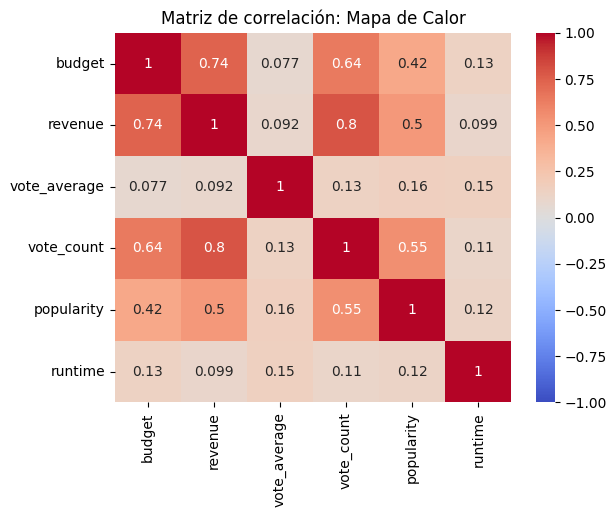

In [166]:
#Podemos representar la matriz de correlación a través del heatmap o mapa de calor:

sns.heatmap(df_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1) #Los valores oscilan entre -1 y 1
plt.title('Matriz de correlación: Mapa de Calor')
plt.show()

Se observa una fuerte correlación entre el presupuesto y los ingresos. Resulta lógico ya que, por lo general, las películas con más presupuesto tienden a generar mayores ingresos. Esto se encuentra, prima facie, acreditado con los datos disponibles.
Si analizamos la correlación entre la ganancia y el conteo de votos (vote_count), también encontramos una fuerte correlación positiva (0.8). Esto indicaría que las películas con más votos tienden a generar más ingresos.
Por otro lado, tenemos una correlación moderada entre el conteo de votos y la popularidad (0.55), lo que sugiere que las películas más populares tienden a recibir más votos.

Merece la pena profundizar la correlación entre el presupuesto y la ganancia, que cuentan con un alto coeficiente de correlación (0.74).

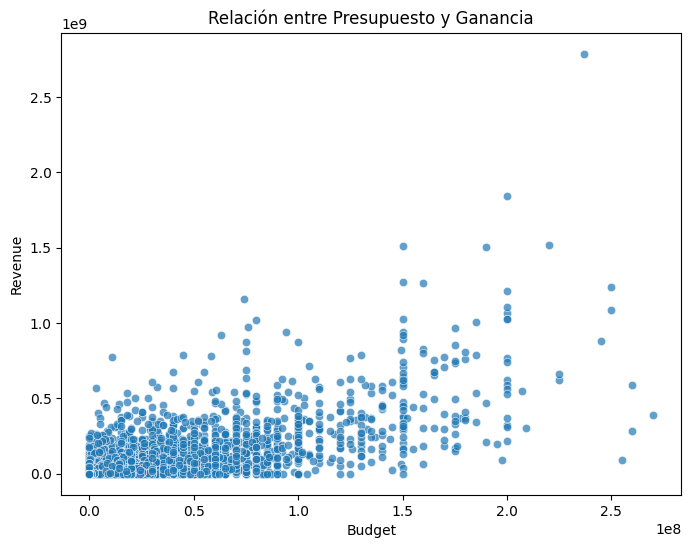

El coeficiente de correlación entre el Presupuesto y la Ganancia es: 0.7387730054488431


In [167]:
# Si bien ya hicimos el cálculo entre todas las columnas, ahora lo haremos respecto a 'budget' y 'revenue'
budgetxrevenue = df['budget'].corr(df['revenue'])

# Podemos encontrar claridad en un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.7)
plt.title('Relación entre Presupuesto y Ganancia')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show() 
print(f'El coeficiente de correlación entre el Presupuesto y la Ganancia es: {budgetxrevenue}')

Distribución de Variables Categóricas:
Presentaremos la calidad de los datos categóricos que forman parte del dataset

In [168]:
generos = df['genresname'].unique()
generos

array(['Science Fiction, Comedy', 'Drama, War', 'Drama', ...,
       'Fantasy, Adventure, Romance, Science Fiction, Family',
       'Thriller, Action, Adventure, Romance',
       'Family, Animation, Science Fiction, Comedy'], dtype=object)

In [171]:
#Como hay géneros repetidos, formaremos un conjunto con géneros únicos
df_genres = df.copy()
df_genres['genresname'] = df_genres['genresname'].where(df['genresname'].notna(), '')
df_genres['genresname'] = df_genres['genresname'].str.replace(r'\s+', '', regex=True)
df_genres['genresname'] = df_genres['genresname'].str.split(',') #En este primer proceso, convertimos a cadenas y hacemos limpieza de comas y espacios en blanco

df_genres = df_genres.explode('genresname')# Expandimos listas en filas separadas

df_genres = df_genres[df_genres['genresname'] != '']# Filtrar los valores vacíos
unique_genres = df_genres['genresname'].unique() #Obtenemos los valores únicos
print(unique_genres)

['ScienceFiction' 'Comedy' 'Drama' 'War' 'Crime' 'Romance' 'Thriller'
 'Horror' 'Adventure' 'Action' 'Mystery' 'Fantasy' 'SinDatos' 'Animation'
 'Family' 'Foreign' 'Documentary' 'Music' 'History' 'Western' 'TVMovie']


<Figure size 1000x1000 with 0 Axes>

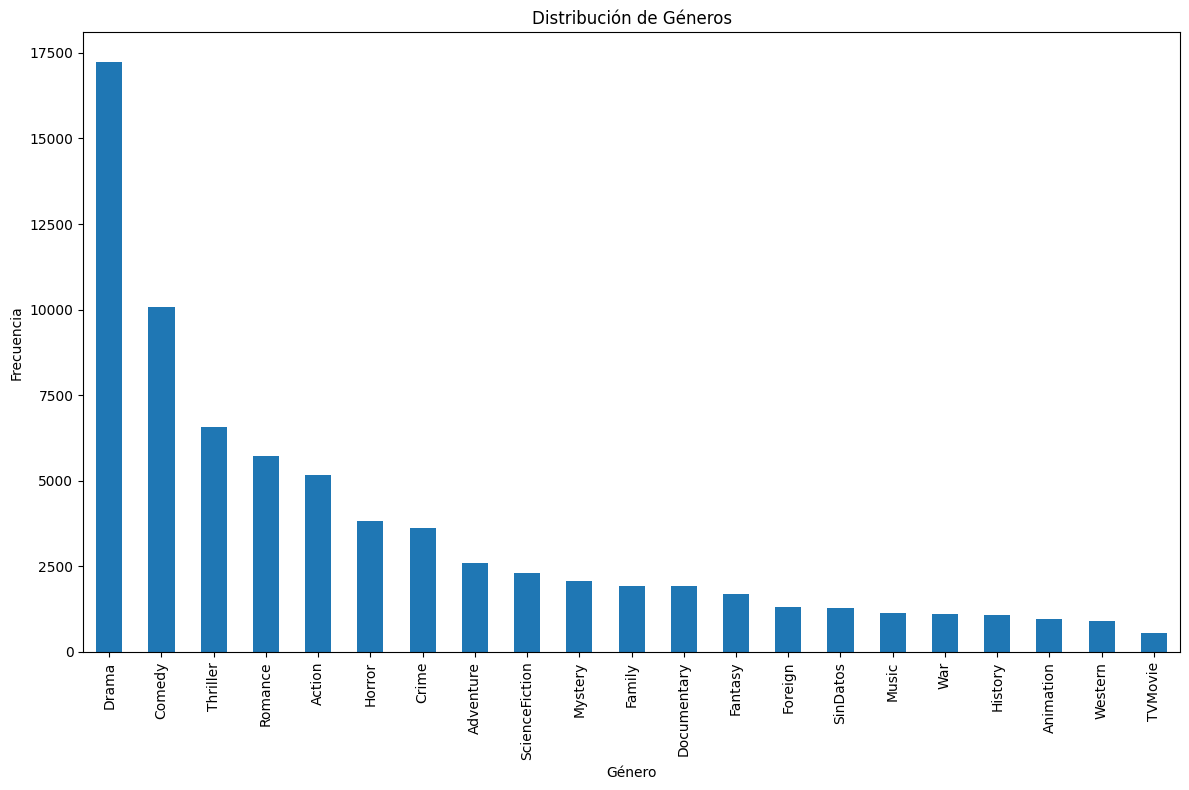

In [170]:
# Crear gráficos de barras para la variable genersname
plt.figure(figsize=(10, 10))
genre_counts = df_genres['genresname'].str.split(',', expand=True).stack().value_counts()

# Graficar la frecuencia de géneros
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Podemos analizar la correlación entre los presupuestos y los géneros, a partir del presupuesto promedio.

C:\Users\GASTON\AppData\Local\Temp\ipykernel_10772\3562414411.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=presupuesto_genero.index, y=presupuesto_genero.values, palette='viridis')


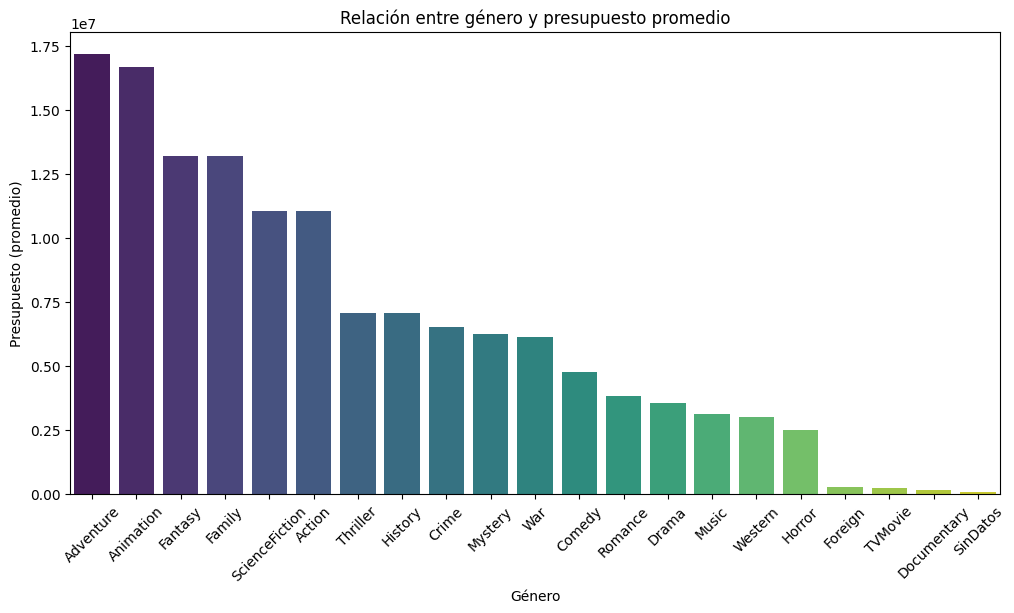

In [173]:
#Primero, debemos calcular el promedio por género:
presupuesto_genero = df_genres.groupby('genresname')['budget'].mean().sort_values(ascending=False)
#Se agrupa el DataFrame df_genres por la columna genresname, se calcula el promedio de la columna budget para cada 
# grupo de género. Por último, se ordenan los géneros de mayor a menor según el presupuesto promedio.

# Graficamos la relación entre género y presupuesto
plt.figure(figsize=(12, 6))
sns.barplot(x=presupuesto_genero.index, y=presupuesto_genero.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Presupuesto (promedio)')
plt.title('Relación entre género y presupuesto promedio')
plt.show()

Podemos observar que los géneros 'Adventure' y 'Animation' tienen presupuestos considerablemente más elevados, seguidos de 'Fantasy', 'Family', 'Science Fiction' y 'Action'.<br>
*Podemos ahora analizar la correlación entre los géneros y las ganancias*

C:\Users\GASTON\AppData\Local\Temp\ipykernel_10772\3584657735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_genre.index, y=revenue_by_genre.values, palette='magma')


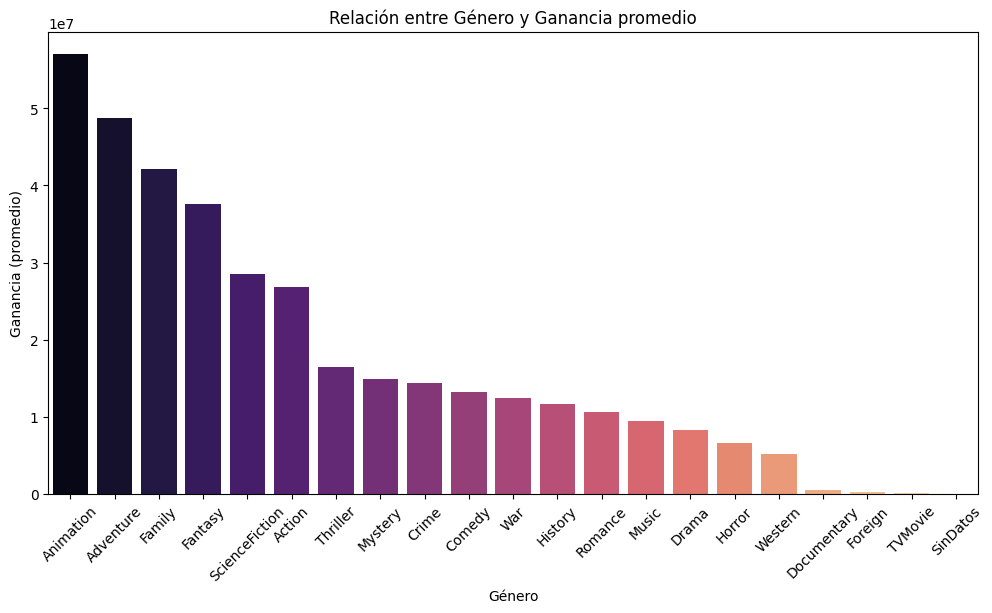

In [175]:
# Calcular el revenue promedio por género
ganancia_genero = df_genres.groupby('genresname')['revenue'].mean().sort_values(ascending=False)

# Graficamos la relación
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_genre.index, y=revenue_by_genre.values, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Ganancia (promedio)')
plt.title('Relación entre Género y Ganancia promedio')
plt.show()


Podemos observar la rentabilidad superior del género 'Animation' que, si bien tiene grandes presupuestos en promedio (ocupando el segundo lugar); se encuentra liderando el ranking de ganancias promedio, superando incluso al género 'Adventure', que tiene un presupuesto superior.

Por último, podemos analizar cómo han evolucionado los distintos parámetros a lo largo del tiempo.

In [179]:
# Agrupar por año y calcular el promedio
tend_temp = df.groupby('release_year')[['budget', 'revenue']].mean().reset_index()


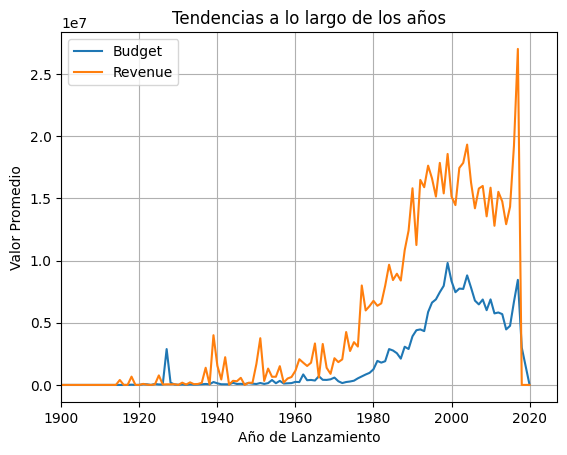

In [181]:
# Establecemos parámetros para el presupuesto
sns.lineplot(data=tend_temp, x='release_year', y='budget', label='Budget')
sns.lineplot(data=tend_temp, x='release_year', y='revenue', label='Revenue') #Aquí determinamos ganancias

plt.title('Tendencias a lo largo de los años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Valor Promedio')
plt.grid(True)
plt.xlim(1900, None)
plt.show()

## Conclusiones

Durante el proceso de ETL, se realizó una evaluación preliminar del dataset, abordando valores nulos, duplicados y columnas innecesarias para el proyecto. 
Tras un análisis exploratorio de datos (EDA), se llevaron a cabo transformaciones adicionales que incluyeron la reducción del número de filas y el manejo detallado de valores nulos y duplicados. El alfabeto latino se estableció como el estándar para la escritura, asegurando consistencia en el dataset.

Se elaboró un dataset abreviado para el sistema de recomendación, y se guardó en formato Parquet, optimizando así el almacenamiento y procesamiento de datos. La depuración del dataset facilitó un análisis estadístico detallado, en el que se evaluaron la distribución de las variables numéricas y sus correlaciones.

Se identificó una correlación positiva significativa entre el presupuesto y los ingresos. Además, se analizaron variables categóricas y su relación con los ingresos y el presupuesto, así como la variación temporal de estas variables.

Los resultados de este análisis, incluyendo la incidencia del presupuesto en las ganancias y la relación entre películas con altas votaciones y mayores ingresos, proporcionan información valiosa para el desarrollo del sistema de recomendación y para mejorar el proceso de visualización. Este análisis exploratorio establece una base sólida para la implementación de un sistema, permitiendo una visualización efectiva y el uso de patrones y correlaciones identificadas.
